In [55]:
import requests
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
housing_data = pd.read_csv("data.csv")
housing_dataframe = pd.DataFrame(housing_data)


In [56]:
housing_dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [57]:
#check statistics of the dataset
housing_dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [58]:
#sort the saleprice from the cheapest price
sorted_saleprice = housing_dataframe.sort_values(by = ['SalePrice'], ascending = True) 

In [59]:
sorted_saleprice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900.0
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311.0
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900.0
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300.0
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [60]:
#show sorted saleprice
sorted_saleprice.loc[:,"SalePrice"]

495     34900.0
916     35311.0
968     37900.0
533     39300.0
30      40000.0
         ...   
2914        NaN
2915        NaN
2916        NaN
2917        NaN
2918        NaN
Name: SalePrice, Length: 2919, dtype: float64

# Scatter plots

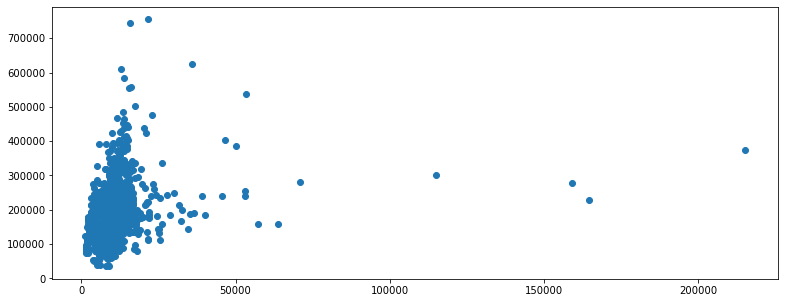

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize = ((13, 5)))
plt.scatter(x = 'LotArea', y = 'SalePrice', data = housing_dataframe)

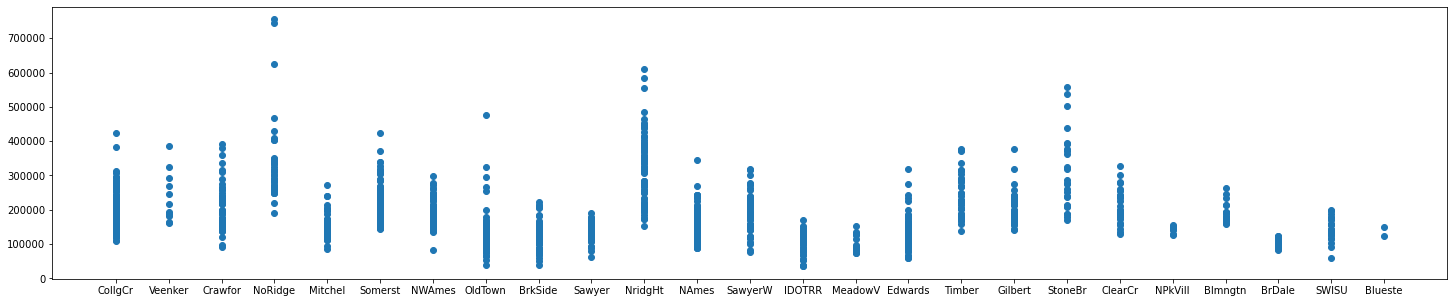

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize = ((25, 5)))
plt.scatter(x = 'Neighborhood', y = 'SalePrice', data = housing_dataframe)


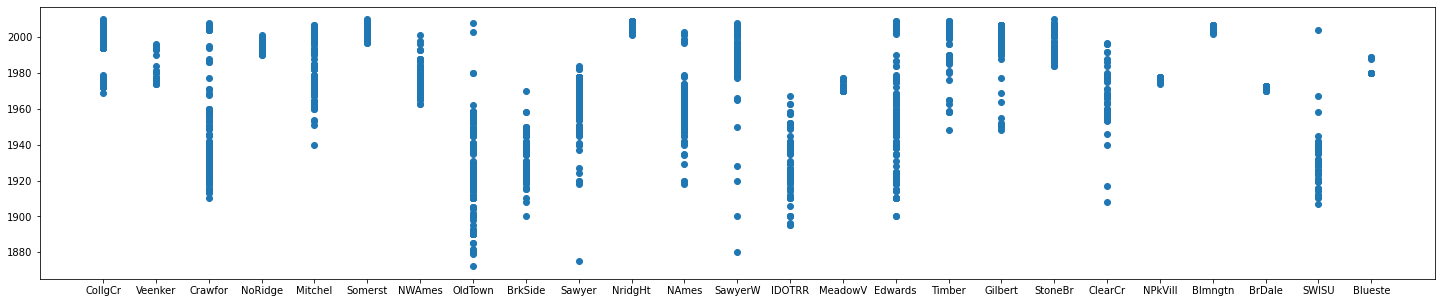

In [63]:
plt.figure(figsize = ((25, 5)))
plt.scatter(x = 'Neighborhood', y = 'YearBuilt', data = housing_dataframe)


Text(0, 0.5, 'Sale Price')

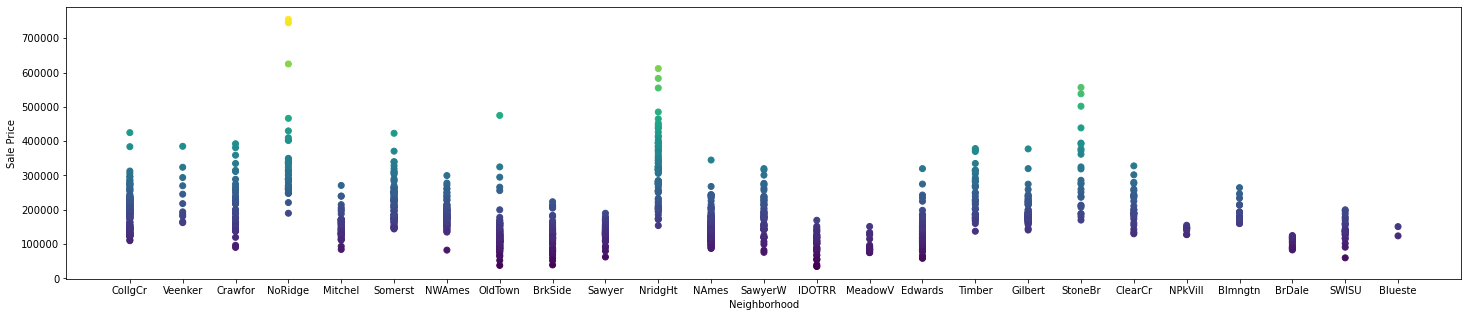

In [64]:
import matplotlib.pyplot as plt
x = 'Neighborhood'
y = 'SalePrice'
plt.figure(figsize = ((25, 5)))
plt.scatter(x,y, data = housing_dataframe, c = y)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')


# Histograms using seaborn

C:\Users\supaw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


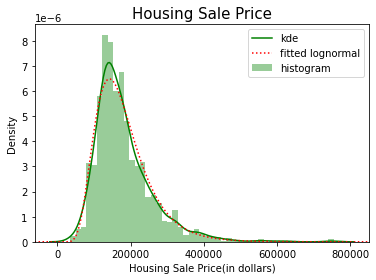

In [69]:

clean_sale = housing_dataframe[['Id','SalePrice']].dropna()
ax = sns.distplot(clean_sale['SalePrice'], color = 'g', kde_kws={'label': 'kde'}, label='histogram')
plt.xlabel('Housing Sale Price(in dollars)')
plt.title('Housing Sale Price', fontsize=15)

shape, location, scale = stats.lognorm.fit(clean_sale['SalePrice'])
x_min, x_max = ax.get_xlim()
xs = np.linspace(x_min, x_max, 200)
ax.plot(xs, stats.lognorm.pdf(xs, s=shape, loc=location, scale=scale), color = 'r', ls=':', label='fitted lognormal')
ax.set_xlim(x_min, x_max) # set the limits back to the ones of the distplot
plt.legend()
plt.show()

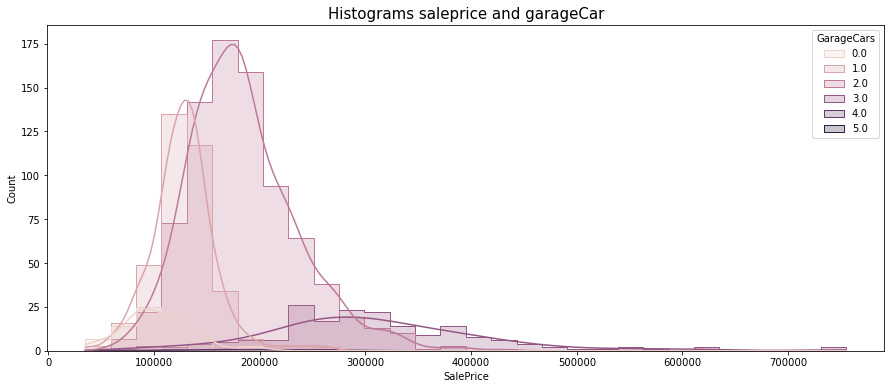

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(x= "SalePrice",
             data=housing_dataframe,
              bins=30,
              hue="GarageCars",
              element="step",
             color=['red','purple','pink','blue','yellow','green'],
              kde=True)
plt.title('Histograms saleprice and garageCar', fontsize=15)
plt.show()


# Extention 2: Correlation

Create a new dataframe that contains useful columns for correlation 

In [14]:
clean_cor = housing_dataframe[['BedroomAbvGr','Neighborhood','RoofStyle','LotArea','YearBuilt','OverallQual','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageType','GarageArea','SalePrice']]

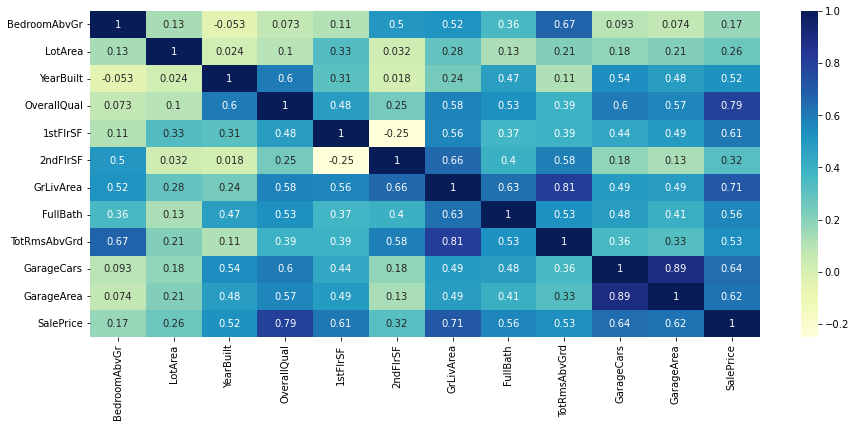

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(clean_cor.corr(), cmap = "YlGnBu", annot = True)
plt.show()


In [16]:
correlation = clean_cor.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)
correlation


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
2ndFlrSF,0.319334
